**Customer lifetime Value/Revenue(LTV/R)** is the present value of the future profits/revenue from a customer. Estimating it, is important for businesses to optimise the marketing costs in acquiring and retaining the customers. Complex consumer behaviour and innumerable ways a consumer interacts with the business makes things challenging to estimate it.

**The Subscription Businesses** can be categorized under the contractual-discrete setting, Where the transactions happen at regular intervals of time and the churn of the customer is clearly observed. It is appropriate to use a group of statistical and ML techniques called *'Survival Models'* in such a business setting.

**Survival Models** are used for predicting time to event. Some of the applications of survival models are -
- Reliability of the Machinery *(**Event:** Machinery Failure, **Subject:** Machine/Group of Machines)*
- Lifetime of the Subscribers *(**Event:** Churn, **Subject:** Subscriber/Group of Subcribers)*
- Efficacy of the Therapy *(**Event:** Death, Next Heart Attack, etc., **Subject:** Patient/Group of Patients)*

**Types of Survival Models -**  
- *Non-Parametric : *
  - No parameters are estimated → Empirical Formulae
  - E.g., Kaplan-meier, Nelson-Aalen, Breslow-Fleming-Harrington, etc.,

- *Parametric : *
  - Assumes a distribution → Parameter estimation techniques
  - E.g., Weibull, Exponential, Lognormal, Accelerated Failure Time (AFT), etc.,

- *Semi Parametric :*
  - Assumes a distribution but Part Parametric, Part Non-Parametric
  - E.g., Cox Proportional Hazards
  
Survival Models can also be classifed into two other types based on the type of subject -  
- *For a Segment:* A Segment can be defined as a group of subscribers sharing a similar characteristic. Eg., Young Subscribers, Subscribers with High Income, etc., Models for segments do not rely on the covariates of the subscribers.
- *For a Subscriber:* Models that estimate survival curves specific to every subscriber rely on the covariates of the subscribers.

**Some of the Open-Source Python Libraries for Survival Analysis -**  
- [Lifelines](https://lifelines.readthedocs.io/en/latest/#)
- [Scikit-survival](https://scikit-survival.readthedocs.io/en/latest/index.html#)
- [PySurvival](https://square.github.io/pysurvival/)

In [0]:
#installing lifelines library
%pip install lifelines

Python interpreter will be restarted.
Collecting lifelines
 Using cached lifelines-0.25.11-py3-none-any.whl (348 kB)
Processing /root/.cache/pip/wheels/85/f5/d2/3ef47d3a836b17620bf41647222825b065245862d12aa62885/autograd-1.3-py3-none-any.whl
Collecting formulaic<0.3,>=0.2.2
 Using cached formulaic-0.2.3-py3-none-any.whl (55 kB)
Requirement already satisfied: matplotlib>=3.0 in /databricks/python3/lib/python3.8/site-packages (from lifelines) (3.2.2)
Requirement already satisfied: pandas>=0.23.0 in /databricks/python3/lib/python3.8/site-packages (from lifelines) (1.1.3)
Requirement already satisfied: scipy>=1.2.0 in /databricks/python3/lib/python3.8/site-packages (from lifelines) (1.5.2)
Requirement already satisfied: numpy>=1.14.0 in /databricks/python3/lib/python3.8/site-packages (from lifelines) (1.19.2)
Processing /root/.cache/pip/wheels/16/a2/b6/582cfdfbeeccd469504a01af3bb952fd9e7eccba40995eafea/autograd_gamma-0.5.0-py3-none-any.whl
Processing /root/.cache/pip/wheels/8e/70/28/3d6ccd6e315f65f245da085482a2e1c7d14b90b30f239e2cf4/future-0.18.2-py3-none-any.whl
Collecting astor
 Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
Requirement already satisfied: wrapt in /databricks/python3/lib/python3.8/site-packages (from formulaic<0.3,>=0.2.2->lifelines) (1.12.1)
Collecting interface-meta>=1.2
 Using cached interface_meta-1.2.3-py2.py3-none-any.whl (14 kB)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.8/site-packages (from matplotlib>=3.0->lifelines) (0.10.0)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib>=3.0->lifelines) (1.3.0)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib>=3.0->lifelines) (2.4.7)
Requirement already satisfied: python-dateutil>=2.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib>=3.0->lifelines) (2.8.1)
Requirement already satisfied: pytz>=2017.2 in /databricks/python3/lib/python3.8/site-packages (from pandas>=0.23.0->lifelines) (2020.5)
Requirement already satisfied: six in /usr/local/lib/python3.8/site-packages (from cycler>=0.10->matplotlib>=3.0->lifelines) (1.15.0)
Installing collected packages: future, autograd, astor, interface-meta, formulaic, autograd-gamma, lifelines
Successfully installed astor-0.8.1 autograd-1.3 autograd-gamma-0.5.0 formulaic-0.2.3 future-0.18.2 interface-meta-1.2.3 lifelines-0.25.11
WARNING: You are using pip version 20.2.4; however, version 21.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-074db794-ee36-4b99-8942-7e79295881e9/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

In [0]:
import numpy as np
import pandas as pd
from random import sample
from datetime import datetime, date

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

from lifelines import KaplanMeierFitter, WeibullFitter, ExponentialFitter, LogNormalFitter, CoxPHFitter
from lifelines.utils import restricted_mean_survival_time

Let's load a sample dataset which has been randomly generated for the demo purpose and saved in a delta table.

In [0]:
data = spark.read.format('delta').load('/LTV/survival-analysis-demo-data+AI').toPandas()
data.set_index(['sID'], drop = True, inplace = True)
data.head(5)

Out[2]:

,income,age,rfm,newsletter_activity,tenure,churn
sID,,,,,,
7000128,<75k,75+,low,Y,4.0,1
7000187,75k-125k,55-64,high,N,6.0,1
7000191,<75k,25-34,high,N,4.0,1
7000290,75k-125k,45-54,high,Y,14.0,1
7000375,75k-125k,25-34,med,N,2.0,1


Each record in the dataset represents a subscriber.

|Field              |Description                                                                      |
|:------------------|:--------------------------------------------------------------------------------|
|sID                |subscriber ID                                                                    |
|income             |income category of the subscriber                                                |
|age                |age category of the subscriber                                                   |
|rfm                |a blended field for recency, frequency and magnitude of website activity         |
|newsletter_activity|have newsletter activity or not (Y or N)                                         |
|tenure             |time period (in years), a subscriber was/has been subscribed for                 |
|churn              |a boolean column, represents whether a subscriber was churned or not             |

In survival analysis context, **churn field** also represents censored observations. check out <https://en.wikipedia.org/wiki/Censoring_(statistics)>.

**Non-Parametric Survival Models**

**Non-Parametric Survival Models** estimate survival probabilities over the time using empirical formulae. Kaplan meier is most commonly used non-parametric survival model.  
**Limitations:**
- cannot be adjusted for covariates
- In real world applications, maybe because of data insufficiency, survival probability might not converge to zero over time. Average lifetime from non-parametric models, in such cases, is not reliable.

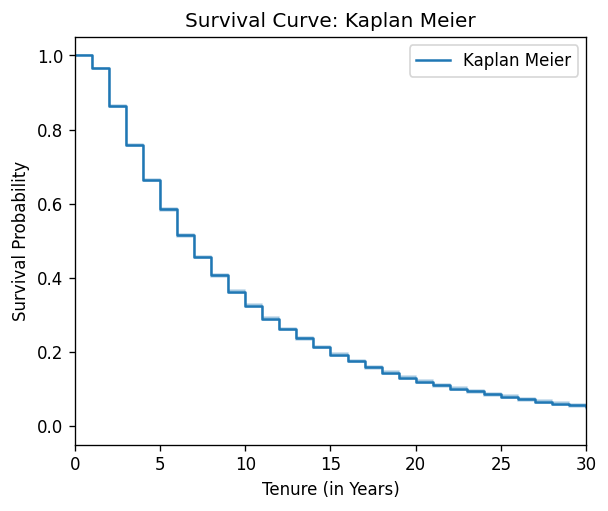

In [0]:
#kaplan-meier
kmf = KaplanMeierFitter()
kmf.fit(data['tenure'], event_observed=data['churn'])

#plot
fig, ax = plt.subplots(figsize=(5.5, 4.5), dpi=120)
kmf.plot(ax=ax, ci_show = True, label = "{}".format('Kaplan Meier'))
ax.set_xlim([0,30])
ax = plt.xlabel('Tenure (in Years)')
ax = plt.ylabel('Survival Probability')
ax = plt.title('Survival Curve: Kaplan Meier')
display(fig)

**Parametric Survival Models**

**Parametric Survival Models** assume a distribution and estimate parameters by using parameter estimation techniques like *maximum likelihood estimation*. Unlike non-parametric models, some of the parametric models can be adjusted for covariates. Eg., Accelerated Failure Time (AFT) Models

**Weibull Probability Density Function:**$$f(t;\beta, \eta, \gamma)= \frac{\beta}{\eta}  (\frac{t - \gamma}{\eta})^{\beta - 1}  {e}^{-(\frac{t - \gamma}{\eta})^{\beta}}$$
**Lognormal Probability Density Function:**$$f(t\prime;\mu\prime, \sigma\prime)= \frac{1}{\sigma\prime \sqrt{2\pi}}{e}^{\frac{-1}{2}(\frac{t\prime-\mu\prime}{\sigma\prime})^{2}}$$
**Exponential Probability Density Function:**$$f(t;\lambda, \gamma)= \lambda {e}^{-\lambda(t-\gamma)}$$

**Cumulative Distribution Function:**$$F(t)= \int_0^t f(t)\;dt$$
**Survival Function:**$$S(t)= 1-F(t)$$

In [0]:
#weibull
weibull = WeibullFitter()
weibull.fit(data['tenure'], event_observed=data['churn'])

#lognormal
lognormal = LogNormalFitter()
lognormal.fit(data['tenure'], event_observed=data['churn'])

#exponential
exponential = ExponentialFitter()
exponential.fit(data['tenure'], event_observed=data['churn'])

Out[4]: <lifelines.ExponentialFitter:"Exponential_estimate", fitted with 146274 total observations, 73223 right-censored observations>

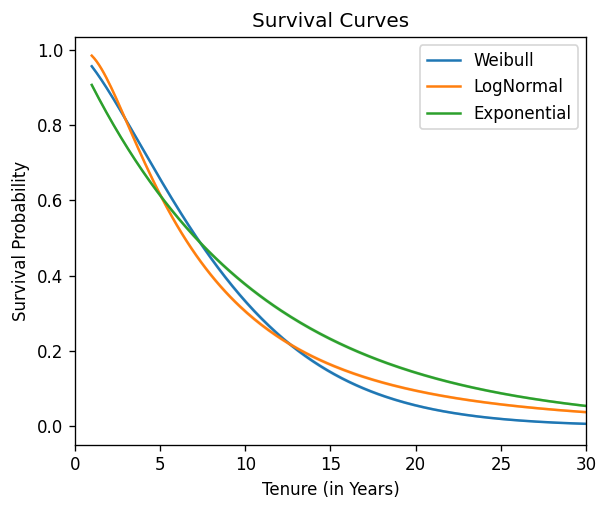

In [0]:
fig, ax = plt.subplots(figsize=(5.5, 4.5), dpi=120)
weibull.plot_survival_function(ax=ax, ci_show = True, label = "{}".format('Weibull')) #weibull
lognormal.plot_survival_function(ax=ax, ci_show = True, label = "{}".format('LogNormal')) #lognormal
exponential.plot_survival_function(ax=ax, ci_show = True, label = "{}".format('Exponential')) #exponential
ax.set_xlim([0,30])
ax = plt.xlabel('Tenure (in Years)')
ax = plt.ylabel('Survival Probability')
ax = plt.title('Survival Curves')
display(fig)

In [0]:
print("AIC - Weibull: {}\nAIC - Lognormal: {}\nAIC - Exponential: {}".format(round(weibull.AIC_), 
                                                                             round(lognormal.AIC_), 
                                                                             round(exponential.AIC_)))

AIC - Weibull: 472943
AIC - Lognormal: 459741
AIC - Exponential: 486136

In [0]:
def get_bestfit_parametric_model(data, tenure_col = 'tenure', churn_col = 'churn', model = None):
  
  parametric = {'WeibullFitter'          : WeibullFitter(),
                'ExponentialFitter'      : ExponentialFitter(),
                'LogNormalFitter'        : LogNormalFitter()}
  para_models = {}
  AIC_Best = np.Inf

  if model != None:
    bestfit_model = model
    para_models[model] = parametric[model]
    para_models[model].fit(data[tenure_col], event_observed=data[churn_col])
  else:
    for i in parametric.keys():
      para_models[i] = parametric[i]
      para_models[i].fit(data[tenure_col], event_observed=data[churn_col])
      if para_models[i].AIC_ < AIC_Best:
        bestfit_model = i
        AIC_Best      = para_models[i].AIC_
      else:
        continue
  return (bestfit_model, para_models[bestfit_model])

**Key LTV Metrics**

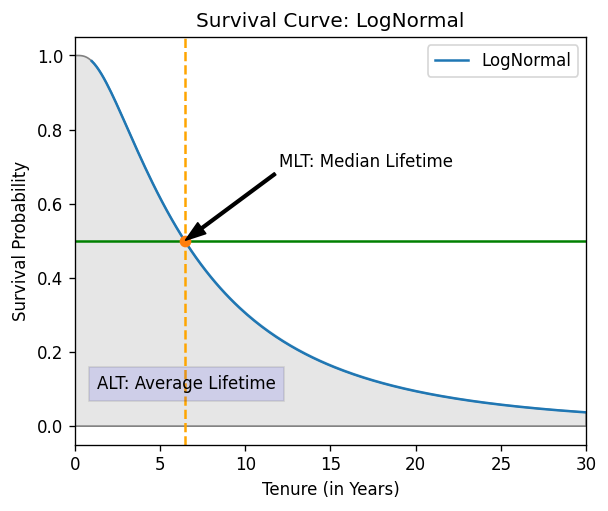

In [0]:
def survival_function(surv_object, time):
  return surv_object.survival_function_at_times(time)

#plot
fig, ax = plt.subplots(figsize=(5.5, 4.5), dpi=120)
lognormal.plot_survival_function(ax=ax, ci_show = True, label = "{}".format('LogNormal'))

#shaded region
ix = np.linspace(0, 30, 3100)
iy = survival_function(lognormal, ix)
verts = [(0, 0), *zip(ix, iy), (30, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')

ax.axhline(y = 0.5, linewidth=1.5, color='green')
ax.axvline(x = lognormal.median_survival_time_, linewidth=1.5, color='orange', linestyle = '--')

ax.text(1.3, 0.1, 'ALT: Average Lifetime', fontsize = 10,
        bbox={'facecolor': 'blue', 'alpha': 0.1, 'pad': 5})
ax.plot([lognormal.median_survival_time_], [0.5], 'o')
ax.annotate('MLT: Median Lifetime', xy=(lognormal.median_survival_time_, 0.5), xytext=(12, 0.7),
            arrowprops=dict(facecolor='black', shrink=0.01, headwidth = 8, width = 1.5))

ax.add_patch(poly)
ax.set_xlim([0,30])
ax = plt.xlabel('Tenure (in Years)')
ax = plt.ylabel('Survival Probability')
ax = plt.title('Survival Curve: LogNormal')
display(fig)

**Retention Rate in the nth year (RRnY):** $$\frac{survival\;probability\;by\;the\;end\;of\;n^{th}\;year}{survival\;probability\;by\;the\;end\;of\;(n-1)^{th}\;year}$$
**Lifetime Value/Revenue (LTV/R):** $$\$ LTV/R = \sum_{i\;=\;0}^{ALT\:(in\;years)}\frac{Current\;ARPU}{(1+discount)^i}$$
Where, *ARPU - Average Revenue per User*

**Validation with Bootstrapping samples**

In [0]:
def get_bootstrap_results(data, tenure_col = 'tenure', churn_col = 'churn', no_of_samples = 200, sample_ratio = 0.7, best_parametric_spec = None):
  
  start_time = datetime.now()
  BootStrap_Dict = {}
  BootStrap_Dict['ALT']  = []
  BootStrap_Dict['MLT']  = []
  BootStrap_Dict['RR1Y'] = []
  BootStrap_Dict['RR2Y'] = []
  sample_size = int(data.index.nunique()*sample_ratio)
  
  for i in range(no_of_samples):
    sample_list = sample(list(data.index), sample_size)
    x = data[(data.index.isin(sample_list))][[tenure_col, churn_col]]
    x.reset_index(drop = True, inplace = True)
    
    kmf = KaplanMeierFitter()
    kmf.fit(x[tenure_col], event_observed=x[churn_col])
    _, bpf = get_bestfit_parametric_model(x, model = best_parametric_spec)

    BootStrap_Dict['ALT'].append(round(restricted_mean_survival_time(bpf, t = 99),6))
    BootStrap_Dict['MLT'].append(round(kmf.median_survival_time_, 6))
    BootStrap_Dict['RR1Y'].append(round(kmf.survival_function_at_times(1).values[0], 6))
    BootStrap_Dict['RR2Y'].append(round(kmf.survival_function_at_times(2).values[0]/kmf.survival_function_at_times(1).values[0], 6))
    
    if (i+1)%50 == 0:
      end_time = datetime.now()
      t = (end_time - start_time).total_seconds()
      print('...ran over {} samples : total time elapsed is {} minutes'.format(i+1, round(t/60, 3)))
      
  return BootStrap_Dict

In [0]:
bootstrap_results = get_bootstrap_results(data, best_parametric_spec = 'LogNormalFitter')

...ran over 50 samples : total time elapsed is 3.165 minutes
...ran over 100 samples : total time elapsed is 6.266 minutes
...ran over 150 samples : total time elapsed is 9.351 minutes
...ran over 200 samples : total time elapsed is 12.45 minutes

In [0]:
bootstrap_results.keys()

Out[11]: dict_keys(['ALT', 'MLT', 'RR1Y', 'RR2Y'])

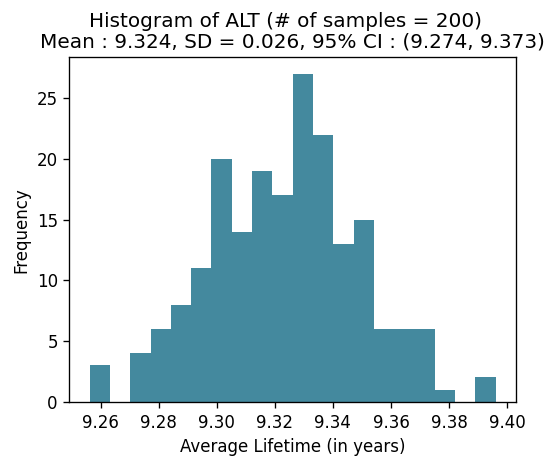

In [0]:
alt_hist = bootstrap_results['ALT']
Q_025 = round(np.quantile(alt_hist, 0.025),3)
Q_975 = round(np.quantile(alt_hist, 0.975),3)
mean = round(np.mean(alt_hist),3)
std = round(np.std(alt_hist),3)

fig, ax = plt.subplots(figsize=(4.8, 3.8), dpi=120)
ax = plt.hist(alt_hist, bins = 20, color = (68/255, 137/255, 158/255))
ax = plt.xlabel('Average Lifetime (in years)')
ax = plt.ylabel('Frequency')
ax = plt.title('Mean : {}, SD = {}, 95% CI : ({}, {})'.format(mean, std, Q_025, Q_975))
ax = plt.suptitle('Histogram of ALT (# of samples = 200)')
display(fig)

**LTV/R for Segments**

In [0]:
def get_lifetimes_for_segments(data, segment_by, tenure_col = 'tenure', churn_col = 'churn'):
  _dict = {}
  for i in sorted([c for c in data[segment_by].unique() if c != '']):
    x = data[(data[segment_by] == i)][[tenure_col, churn_col]]
    x.reset_index(drop = True, inplace = True)
    bestfit_model, bpf = get_bestfit_parametric_model(x)
    if len(x) == 0:
      continue
    _dict["{}".format(i)] = {}
    _dict["{}".format(i)]["parametric"] = bestfit_model
    _dict["{}".format(i)]["Model"] = bpf
    _dict["{}".format(i)]["ALT"]   = round(restricted_mean_survival_time(bpf, t = 99),3)
    _dict["{}".format(i)]["Size"]  = x[churn_col].count()
  return _dict

def ltv_discount(subscription_value, lifetime, discount):
  x = [subscription_value/((1+discount)**i) for i in range(int(lifetime))]
  ltv = sum(x)
  p = lifetime%1
  if p != 0:
    ltv += p*(subscription_value/((1+discount)**int(lifetime)))
  return round(ltv,3)

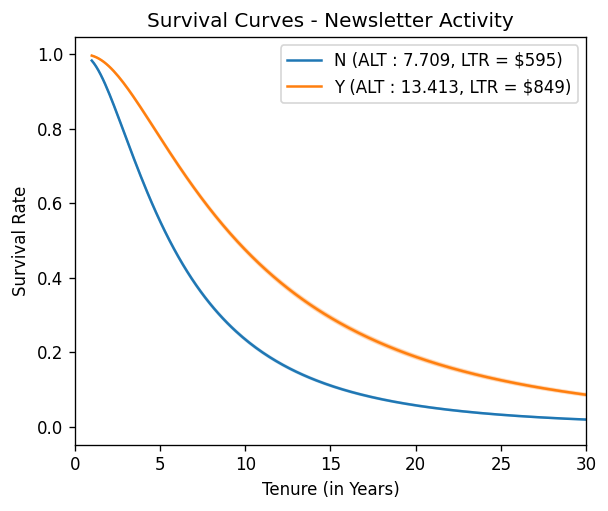

In [0]:
NLsegments = get_lifetimes_for_segments(data, segment_by = 'newsletter_activity')

fig, ax = plt.subplots(figsize=(5.5, 4.5), dpi=120)
for i in NLsegments.keys():
  NLsegments[i]['LTR'] = ltv_discount(100, NLsegments[i]['ALT'], 0.085)
  NLsegments[i]['Model'].plot_survival_function(ax=ax, ci_show = True, label = "{} (ALT : {}, LTR = ${})".format(i.capitalize(), 
                                                                                                                  NLsegments[i]['ALT'], 
                                                                                                                  round(NLsegments[i]['LTR'])))
ax.set_xlim([0,30])
ax = plt.xlabel('Tenure (in Years)')
ax = plt.ylabel('Survival Rate')
ax = plt.title('Survival Curves - Newsletter Activity')
display(fig)